# Project details
With almost `30k commits and a history spanning over ten years`, Scala is a mature programming language. It is a general-purpose programming language that has recently become another prominent language for data scientists.

Scala is also an open source project. Open source projects have the advantage that their entire development histories -- `who made changes, what was changed, code reviews, etc`. -- are publicly available.

<img src='scala.png' alt='Scala logo'/>

### Objectives
* Visualizing and exploring the real world project repository of Scala that spans data from a version control system (Git) as well as a project hosting site (GitHub). 
* Finding out who has had the most influence on its development and who are the experts.

### Data Source
> The dataset has been mined and extracted from GitHub. It was collected in January of 2018.

**pulls_2011-2013.csv** contains the basic information about the pull requests, and spans from the end of 2011 up to (but not including) 2014.

**pulls_2014-2018.csv** contains identical information, and spans from 2014 up to 2018.

**pull_files.csv** contains the files that were modified by each pull request.

# Preparing 

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Loading in the data
pulls_2011_2013 = pd.read_csv('pulls_2011-2013.csv')
pulls_2014_2018 = pd.read_csv('pulls_2014-2018.csv')
pull_files = pd.read_csv('pull_files.csv') 

In [56]:
pull_files.info()
pull_files.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85588 entries, 0 to 85587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     85588 non-null  int64 
 1   file    85588 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


In [57]:
pulls_2011_2013.info()
pulls_2011_2013.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3296 entries, 0 to 3295
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     3296 non-null   int64 
 1   user    3296 non-null   object
 2   date    3296 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.4+ KB


,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z


In [58]:
pulls_2014_2018.info()
pulls_2014_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     2904 non-null   int64 
 1   user    2904 non-null   object
 2   date    2904 non-null   object
dtypes: int64(1), object(2)
memory usage: 68.2+ KB


,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z


#### Compining dataframes

In [81]:
pulls = pulls_2011_2013.append(pulls_2014_2018, ignore_index=True)
pulls.head()

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z


#### Converting date type to date

In [84]:
pulls['date'] = pd.to_datetime(pulls['date'], utc=True)
pulls.sample(5)

,pid,user,date
2739,1361897,lrytz,2012-05-16 07:28:20+00:00
5523,22030755,Ichoran,2014-09-30 19:59:08+00:00
1025,4730006,demobox,2013-03-21 00:09:44+00:00
383,8235226,retronym,2013-09-11 07:28:07+00:00
6070,12104360,Ichoran,2014-02-01 04:59:12+00:00


#### Merging dataframes

In [85]:
data = pd.merge(pulls, pull_files, on='pid')
data.head()

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85588 entries, 0 to 85587
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   pid     85588 non-null  int64              
 1   user    85588 non-null  object             
 2   date    85588 non-null  datetime64[ns, UTC]
 3   file    85588 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 3.3+ MB


# Analyze

### Pulls activities over time

In [93]:
# Create a column that will store the month
data['month'] = data['date'].dt.month

# Create a column that will store the year
data['year'] = data['date'].dt.year

In [94]:
data.head()

,pid,user,date,file,month,year
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala,12,2013
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala,12,2013
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check,12,2013
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...,12,2013
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....,12,2013


In [117]:
counts = data.groupby(['year', 'month'])['pid'].count()
counts.head()

year  month
2011  12        590
2012  1         489
      2         787
      3         880
      4        3354
Name: pid, dtype: int64

Text(0.5, 1.0, 'Number Of Pulls Per Month Across Years')

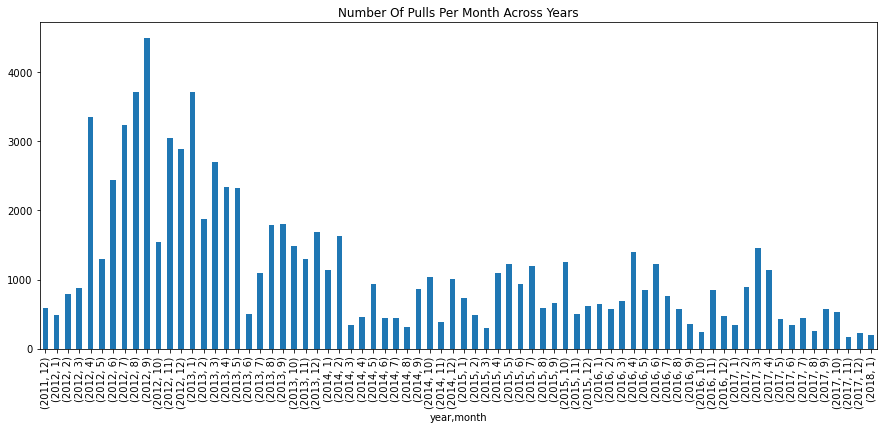

In [134]:
%matplotlib inline
counts.plot(kind='bar', figsize=(15, 6))
plt.title('Number Of Pulls Per Month Across Years')

In [121]:
activity_by_year = data.groupby(['year'])['pid'].count()
activity_by_year

year
2011      590
2012    28190
2013    22622
2014     8979
2015     9579
2016     8609
2017     6817
2018      202
Name: pid, dtype: int64

<AxesSubplot:xlabel='year'>

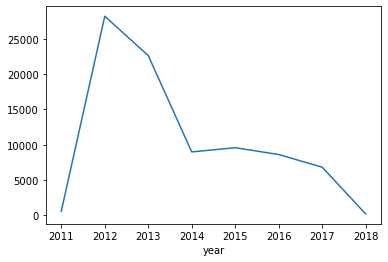

In [123]:
activity_by_year.plot()

Text(0.5, 1.0, 'Number Of Pulls Per Year')

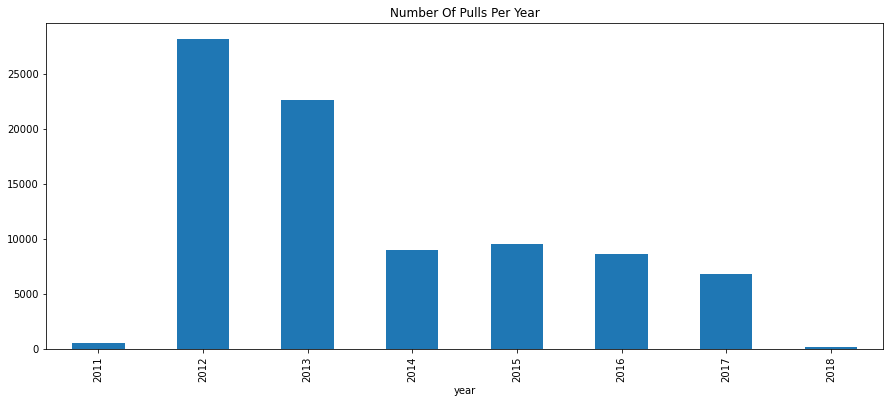

In [132]:
activity_by_year.plot(kind='bar', figsize=(15, 6))
plt.title('Number Of Pulls Per Year')

**Conclusion**:
> Based on the dataset we have, the most pulls happened on 2012 and 2013

### Pull requests by each user

In [153]:
len(data['user'].unique())

464

In [137]:
by_user = data.groupby('user')['pid'].count()

Text(0.5, 1.0, 'Number Of Pulls By User')

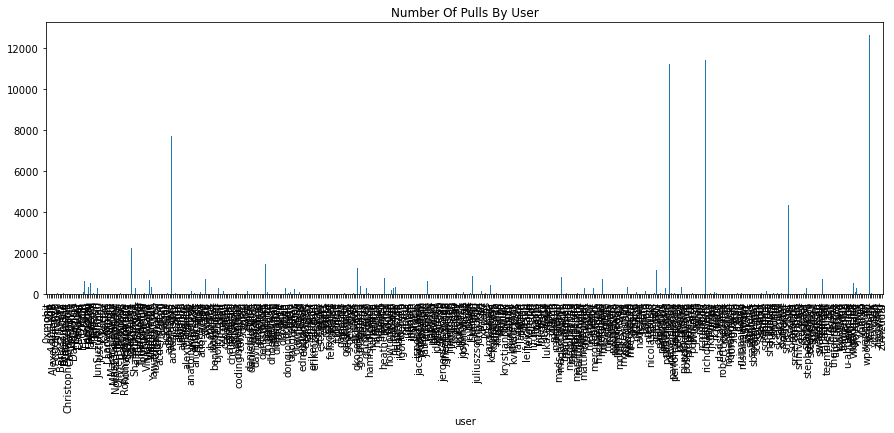

In [148]:
by_user.plot(kind='bar', figsize=(15, 5))

plt.title('Number Of Pulls By User')

<AxesSubplot:ylabel='Frequency'>

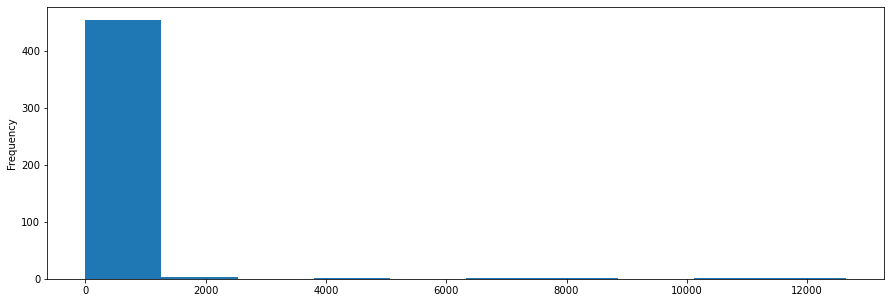

In [149]:
by_user.plot(kind='hist', figsize=(15, 5))


### What files were changed in the last ten pull requests?

In [172]:
last_10_pulls = pulls.sort_values(by='date', ascending=False).head(10)
last_10_pulls

,pid,user,date
3296,163314316,hrhino,2018-01-16 23:29:16+00:00
3297,163061502,joroKr21,2018-01-15 23:44:52+00:00
3298,163057333,mkeskells,2018-01-15 23:05:06+00:00
3299,162985594,lrytz,2018-01-15 15:52:39+00:00
3300,162838837,zuvizudar,2018-01-14 19:16:16+00:00
3301,162765232,howtonotwin,2018-01-13 04:37:17+00:00
3302,162643301,hrhino,2018-01-12 14:29:49+00:00
3303,162256029,mkeskells,2018-01-10 23:20:03+00:00
3304,162197834,SethTisue,2018-01-10 18:31:25+00:00
3305,162011899,joroKr21,2018-01-10 00:45:57+00:00


In [177]:
last_10_joined = pd.merge(last_10_pulls, pull_files, on='pid')
last_10_joined.head()

,pid,user,date,file
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java


In [188]:
files = set(last_10_joined['file'])
len(files)

34

In [187]:
x = last_10_joined['file']
len(x.unique())

34

In [189]:
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

### Who made the most pull requests to a given file?
When contributing to a project, we might need some guidance. We might find ourselves needing some information regarding the codebase. It is important direct any questions to the right person. Contributors to open source projects generally have other day jobs, so their time is limited. It is important to address our questions to the right people. One way to identify the right target for our inquiries is by using their contribution history.

We identified `src/compiler/scala/reflect/reify/phases/Calculate.scala` as being recently changed. We are interested in the top 3 developers who changed that file. Those developers are the ones most likely to have the best understanding of the code.

In [190]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

In [195]:
file_commit = data[data['file'] == file]
file_commit.head()

,pid,user,date,file,month,year
1234,10587633,retronym,2013-12-06 10:04:43+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,12,2013
12514,5320191,soc,2013-04-23 15:47:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
12823,5291974,bjornregnell,2013-04-22 13:56:06+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
13381,5050360,retronym,2013-04-09 06:13:57+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
13779,5026775,retronym,2013-04-08 07:07:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013


In [209]:
num_commit_by_user = file_commit.groupby('user')['pid'].count()
num_commit_by_user

user
bjornregnell     1
densh            1
gkossakowski     1
melloc           1
odersky          2
paulp            2
retronym         5
soc              4
starblood        1
xeno-by         11
zuvizudar        1
Name: pid, dtype: int64

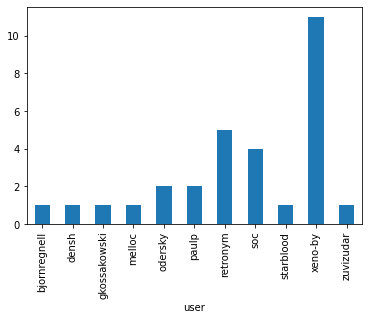

In [211]:
num_change_by_user.plot(kind='bar');

**Conclusion**:
>The most pull requests made to the file is by xeno-by

### Who made the last ten pull requests on a given file?
Open source projects suffer from fluctuating membership. This makes the problem of finding the right person more challenging: the person has to be knowledgeable and still be involved in the project. A person that contributed a lot in the past might no longer be available (or willing) to help. To get a better understanding, we need to investigate the more recent history of that particular part of the system.

Like in the previous task, we will look at the history of `src/compiler/scala/reflect/reify/phases/Calculate.scala.`

In [223]:
file_changed = pull_files[pull_files['file'] == file]
file_changed.head()

,pid,file
13,162838837,src/compiler/scala/reflect/reify/phases/Calcul...
26951,22845163,src/compiler/scala/reflect/reify/phases/Calcul...
32753,12102550,src/compiler/scala/reflect/reify/phases/Calcul...
35420,10587633,src/compiler/scala/reflect/reify/phases/Calcul...
46700,5320191,src/compiler/scala/reflect/reify/phases/Calcul...


In [225]:
joined_pr = pd.merge(file_changed, pulls)
joined_pr.head()

,pid,file,user,date
0,162838837,src/compiler/scala/reflect/reify/phases/Calcul...,zuvizudar,2018-01-14 19:16:16+00:00
1,22845163,src/compiler/scala/reflect/reify/phases/Calcul...,retronym,2014-10-16 10:23:42+00:00
2,12102550,src/compiler/scala/reflect/reify/phases/Calcul...,xeno-by,2014-02-01 01:19:58+00:00
3,10587633,src/compiler/scala/reflect/reify/phases/Calcul...,retronym,2013-12-06 10:04:43+00:00
4,5320191,src/compiler/scala/reflect/reify/phases/Calcul...,soc,2013-04-23 15:47:45+00:00


In [236]:
user_last_10 = joined_pr.nlargest(10, 'date')
user_last_10

,pid,file,user,date
0,162838837,src/compiler/scala/reflect/reify/phases/Calcul...,zuvizudar,2018-01-14 19:16:16+00:00
1,22845163,src/compiler/scala/reflect/reify/phases/Calcul...,retronym,2014-10-16 10:23:42+00:00
2,12102550,src/compiler/scala/reflect/reify/phases/Calcul...,xeno-by,2014-02-01 01:19:58+00:00
3,10587633,src/compiler/scala/reflect/reify/phases/Calcul...,retronym,2013-12-06 10:04:43+00:00
4,5320191,src/compiler/scala/reflect/reify/phases/Calcul...,soc,2013-04-23 15:47:45+00:00
5,5291974,src/compiler/scala/reflect/reify/phases/Calcul...,bjornregnell,2013-04-22 13:56:06+00:00
6,5050360,src/compiler/scala/reflect/reify/phases/Calcul...,retronym,2013-04-09 06:13:57+00:00
7,5026775,src/compiler/scala/reflect/reify/phases/Calcul...,retronym,2013-04-08 07:07:45+00:00
8,4786005,src/compiler/scala/reflect/reify/phases/Calcul...,starblood,2013-03-25 02:48:48+00:00
9,4295399,src/compiler/scala/reflect/reify/phases/Calcul...,retronym,2013-02-24 21:43:43+00:00


In [237]:
user_last_10['user']

0       zuvizudar
1        retronym
2         xeno-by
3        retronym
4             soc
5    bjornregnell
6        retronym
7        retronym
8       starblood
9        retronym
Name: user, dtype: object

### The pull requests of two special developers
Now that we have identified two potential contacts in the projects, we need to find the person who was most involved in the project in recent times. That person is most likely to answer our questions. For each calendar year, we are interested in understanding the number of pull requests the authors submitted. This will give us a high-level image of their contribution trend to the project.

In [238]:
# The developers we are interested in
authors = ['xeno-by', 'soc']

In [244]:
by_author = pulls[pulls['user'].isin(authors)]
by_author.head()

,pid,user,date
7,11126653,xeno-by,2013-12-28 19:39:23+00:00
9,11121557,xeno-by,2013-12-27 23:50:56+00:00
10,11121465,xeno-by,2013-12-27 23:41:05+00:00
11,11121327,xeno-by,2013-12-27 23:25:52+00:00
12,11114584,xeno-by,2013-12-27 15:51:50+00:00


In [253]:
counts = by_author.groupby([by_author['user'], by_author['date'].dt.year]).agg({'pid': 'count'})
counts

pid
user    date     
soc     2011   12
        2012   44
        2013  117
        2014   20
        2015   24
        2016   21
xeno-by 2011   20
        2012  271
        2013  123
        2014   60
        2015    3

In [254]:
counts = by_author.groupby([by_author['user'], by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()
counts

,user,date,pid
0,soc,2011,12
1,soc,2012,44
2,soc,2013,117
3,soc,2014,20
4,soc,2015,24
5,soc,2016,21
6,xeno-by,2011,20
7,xeno-by,2012,271
8,xeno-by,2013,123
9,xeno-by,2014,60


In [256]:
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)
counts_wide

user,soc,xeno-by
date,,
2011,12,20
2012,44,271
2013,117,123
2014,20,60
2015,24,3
2016,21,0


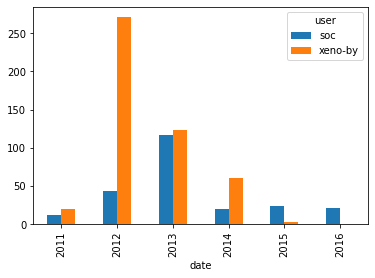

In [258]:
counts_wide.plot(kind='bar');

### Visualizing the contributions of each developer
We want to see which of our two developers of interest have the most experience with the code in a given file. 
We will measure experience by 
* the number of pull requests submitted that affect that file  
* how recent those pull requests were submitted.

In [260]:
by_author = data[data['user'].isin(authors)]
by_author.head()

,pid,user,date,file,month,year
25,11126653,xeno-by,2013-12-28 19:39:23+00:00,src/reflect/scala/reflect/internal/Mirrors.scala,12,2013
26,11126653,xeno-by,2013-12-28 19:39:23+00:00,test/junit/scala/reflect/internal/MirrorsTest....,12,2013
31,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104a.check,12,2013
32,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104a/Macros_1.scala,12,2013
33,11121557,xeno-by,2013-12-27 23:50:56+00:00,test/files/neg/t8104a/Test_2.scala,12,2013


In [262]:
by_file = by_author[by_author['file'] == file]
by_file.head()

,pid,user,date,file,month,year
12514,5320191,soc,2013-04-23 15:47:45+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,4,2013
18341,4019878,soc,2013-02-06 18:24:21+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,2,2013
28951,2721711,soc,2012-10-21 19:58:20+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,10,2012
35498,2072662,xeno-by,2012-08-16 05:39:22+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,8,2012
35608,2071228,xeno-by,2012-08-15 23:41:59+00:00,src/compiler/scala/reflect/reify/phases/Calcul...,8,2012


In [264]:
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()
grouped

,user,date,pid
0,soc,2012,2
1,soc,2013,2
2,xeno-by,2012,10
3,xeno-by,2014,1


In [266]:
by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)
by_file_wide

user,soc,xeno-by
date,,
2012,2,10
2013,2,0
2014,0,1


<AxesSubplot:xlabel='date'>

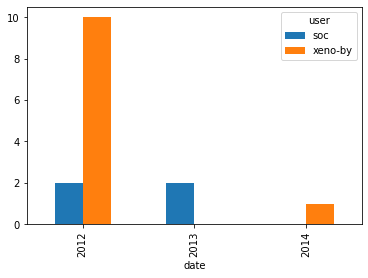

In [267]:
by_file_wide.plot(kind='bar')

**Note**

This project is one of DataCamp Projects.

`DONE ON`: 22.09.2021
